In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats 

In [2]:
df = pd.read_csv('advertising.csv')

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


### Checking and eliminating outliers

<AxesSubplot:>

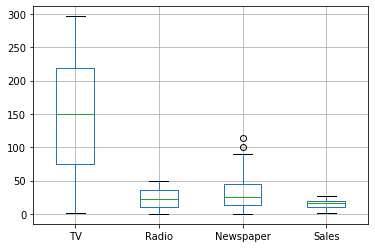

In [6]:
df.boxplot()

<AxesSubplot:>

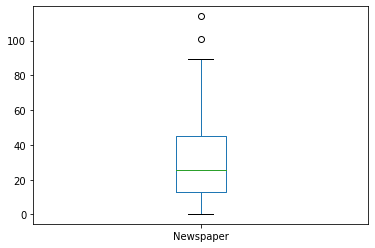

In [7]:
df.Newspaper.plot(kind='box')

In [8]:
z_scores = stats.zscore(df)

abs_z_scores = np.abs(z_scores)

# A data point can be considered unusual if its z-score is above 3 or below -3 , so excluding rows with absolute z-score >3

filtered_entries = (abs_z_scores < 3).all(axis=1)  # Row-wise boolean values- False for rows with outlier for any column

new_df = df[filtered_entries]

In [9]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         198 non-null    float64
 1   Radio      198 non-null    float64
 2   Newspaper  198 non-null    float64
 3   Sales      198 non-null    float64
dtypes: float64(4)
memory usage: 7.7 KB


In [10]:
new_df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


<AxesSubplot:>

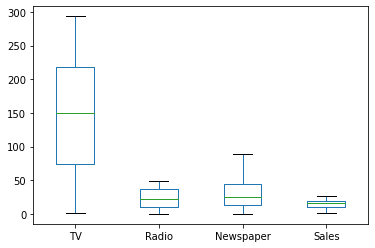

In [11]:
new_df.plot(kind='box')

### Correlation Matrix

In [12]:
new_df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.051978,0.049771,0.899974
Radio,0.051978,1.000000,0.346364,0.348566
Newspaper,0.049771,0.346364,1.000000,0.151764
Sales,0.899974,0.348566,0.151764,1.000000


### Looking at Collinearity between variables if any

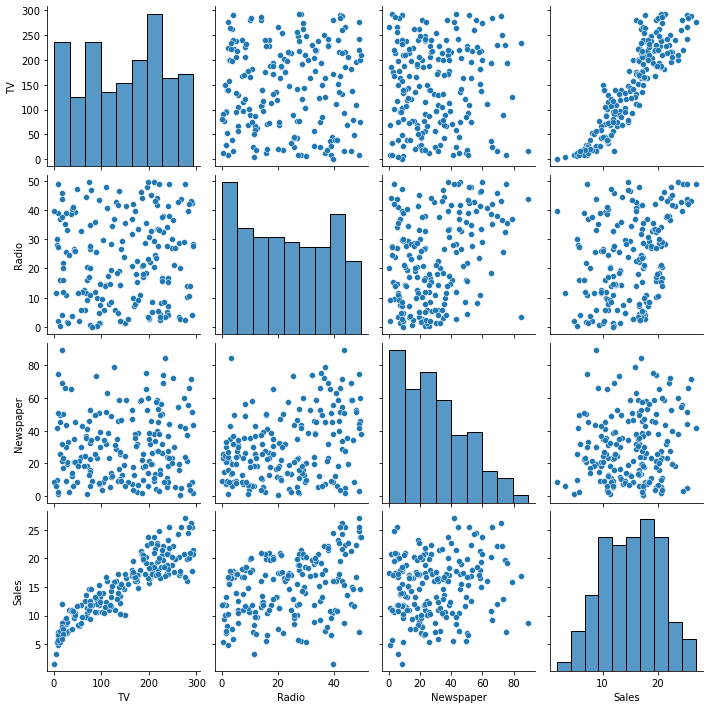

In [13]:
# pairplot to visualize scatterplot and histplot to see collinearity between variables

sns.pairplot(new_df)

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

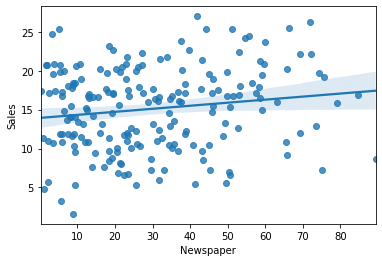

In [14]:
sns.regplot(data=new_df, x='Newspaper', y='Sales')

<AxesSubplot:xlabel='Radio', ylabel='Sales'>

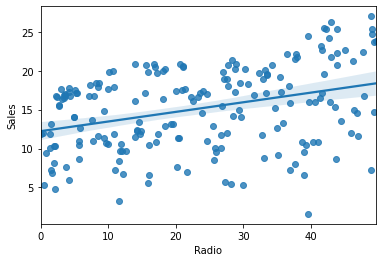

In [15]:
sns.regplot(data=new_df, x='Radio', y='Sales')

<AxesSubplot:xlabel='TV', ylabel='Sales'>

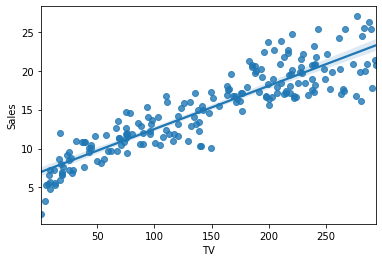

In [16]:
sns.regplot(data=new_df, x='TV', y='Sales')

### Checking assumptions

<b>Assumption 1</b>: No or less collinearity among independent variables i.e. TV, Newspaper and Radio -  Checked  

<b>Assumption 2</b>: Linear relationship between independent variables (TV, Newspaper and Radio) and dependent variable (Sales):
> Checked -Tv and Sales have strong relation while newspaper have little linear relation with Sales 

<b>Assumption 3</b>: Sample size much greater than 30, so we assume the normal distribution of variables. Histplot in above pairplot suggest Sales are normally distributed in our dataset.

In [17]:
# !pip install scikit-learn

In [18]:
x = new_df.loc[:,['TV','Radio','Newspaper']]
y = new_df.Sales

In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=80)

In [20]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

### Model Evaluation

In [21]:
from sklearn.metrics import r2_score, accuracy_score
from sklearn import metrics

In [22]:
predict_train = lr.predict(x_train)
print('R-squared score : ',r2_score(y_train,predict_train))
print('MAE:', metrics.mean_absolute_error(y_train,predict_train))
print('MSE:', metrics.mean_squared_error(y_train,predict_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train,predict_train)))

R-squared score :  0.8996256353043127
MAE: 1.2728126340422594
MSE: 2.775899776942589
RMSE: 1.6661031711579535


In [23]:
print('R-squared score : ',r2_score(y_test,y_pred))

R-squared score :  0.9034214320116062


In [24]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1.1436397625625159
MSE: 2.640890237894434
RMSE: 1.6250816096105556


In [25]:
print('Coefficients of model :', lr.coef_)
print('Intercept of model :', lr.intercept_)

Coefficients of model : [0.05590296 0.10617659 0.00240016]
Intercept of model : 4.4441558221678275


### Model performance Visualization

In [26]:
predictions = lr.predict(x)

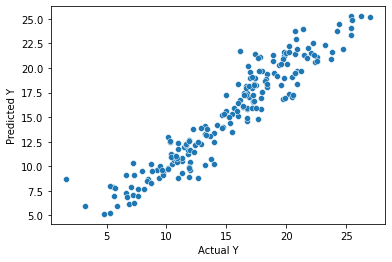

In [27]:
sns.scatterplot(x=y, y=predictions)
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')

In [28]:
resi = y-predictions

Text(0.5, 1.0, 'Residual plot to check homoscedasticity')

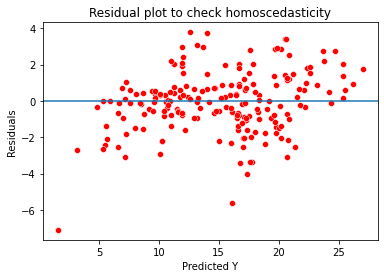

In [29]:
fig = sns.scatterplot(x=y, y=resi, color='r')
fig.axhline(0)
plt.xlabel('Predicted Y')
plt.ylabel('Residuals')
plt.title('Residual plot to check homoscedasticity')

Text(0.5, 1.0, 'Distribution of residuals')

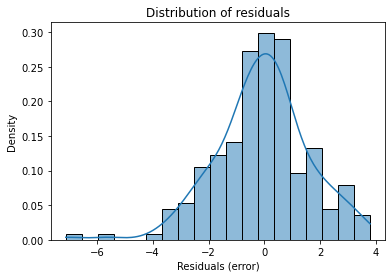

In [30]:
sns.histplot(resi, stat='density', kde=True)
plt.xlabel('Residuals (error)')
plt.title('Distribution of residuals')

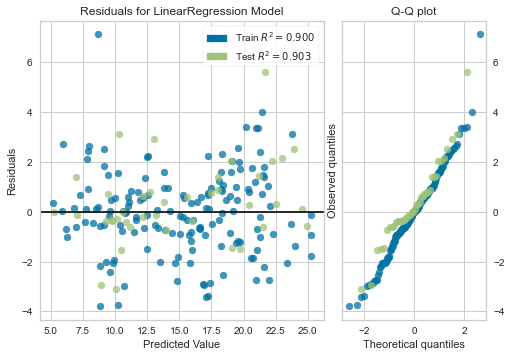

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [31]:
# !pip install yellowbrick
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(lr, hist=False, qqplot=True)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()